In [304]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
from keras import optimizers
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Convolution2D

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None
from scipy.interpolate import griddata
# Any results you write to the current directory are saved as output.

['Train.csv', 'Test.csv', 'sample.csv']


In [282]:
train_data = pd.read_csv('../input/Train.csv')
test_data = pd.read_csv('../input/Test.csv')

In [283]:
labels = train_data['label']
train = pd.concat([train_data.iloc[:, 368:len(train_data.columns)-1]], axis=1)
test = pd.concat([test_data.iloc[:, 368:len(test_data.columns)]], axis=1)
train_un = pd.concat([train_data.iloc[:, 368:len(train_data.columns)-1]], axis=1)
test_un = pd.concat([test_data.iloc[:, 368:len(test_data.columns)]], axis=1)

In [284]:
def interpolation(array):
    x = np.arange(0, array.shape[1])
    y = np.arange(0, array.shape[0])
    array = np.ma.masked_invalid(array)
    xx, yy = np.meshgrid(x, y)
    x1 = xx[~array.mask]
    y1 = yy[~array.mask]
    newarr = array[~array.mask]
    GD1 = griddata((x1, y1), newarr.ravel(),(xx, yy),method='cubic')
    return GD1.reshape(1024,)

In [285]:
def imgShow(im):
    res = np.array(im).reshape(32,32)
    plt.imshow(res,interpolation='nearest', cmap = plt.cm.gray)

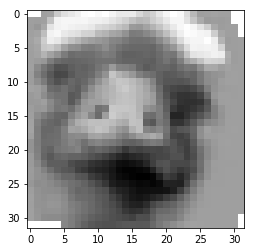

In [273]:
imgShow(train.iloc[1])

In [286]:
for i in range(0,train.shape[0]):
    train.iloc[i] = interpolation(np.array(train.iloc[i]).reshape(32,32))

In [299]:
X_train, X_test, y_train, y_test = train_test_split(train, labels)

In [277]:
type(train)

pandas.core.frame.DataFrame

In [300]:
X_train = X_train.values.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.values.reshape(X_test.shape[0], 32, 32, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

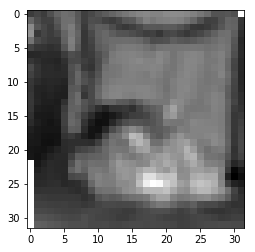

In [274]:
imgShow(X_train[1])

In [307]:
model = Sequential()

model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,1)))

model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))

model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))

model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))

model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])




In [298]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 36375 samples, validate on 12125 samples
Epoch 1/5
36375/36375 [==============================] - 7s 192us/step - loss: 2.3186 - acc: 0.0991 - val_loss: 2.3078 - val_acc: 0.1014
Epoch 2/5
36375/36375 [==============================] - 7s 198us/step - loss: 2.3091 - acc: 0.1013 - val_loss: 2.3079 - val_acc: 0.1016
Epoch 3/5
36375/36375 [==============================] - 7s 193us/step - loss: 2.3086 - acc: 0.1014 - val_loss: 2.3064 - val_acc: 0.1016
Epoch 4/5
 5280/36375 [===>..........................] - ETA: 4s - loss: 2.3077 - acc: 0.0975